In [1]:
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
feb_tweets = pd.read_csv('feb_data.csv')
march_tweets = pd.read_csv('march_data.csv')
april_tweets = pd.read_csv('april_data.csv')

In [3]:
feb_tweets.columns, march_tweets.columns, april_tweets.columns = ['Number', "Date", "Text"], ['Number', "Date", "Text"], ['Number', "Date", "Text"]
feb_tweets = feb_tweets.drop(columns = ["Number"])
march_tweets = march_tweets.drop(columns = ["Number"])
april_tweets = april_tweets.drop(columns = ["Number"])

In [4]:
feb_tweets["Month"] = "February"
march_tweets["Month"] = "March"
april_tweets["Month"] = "April"

data = pd.concat([feb_tweets, march_tweets, april_tweets], ignore_index=True)

## Exploratory Data Analysis

### Data Cleaning

In [5]:
new_stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])

In [6]:
def cleanText(text):
    text = text.lower() # Makes text lowercase
    text = re.sub('https?:\/\/\S+', '', text) # Removes hyperlinks
    text = re.sub('#', '', text) # Removes hashtags
    text = re.sub('@[A-Za-z0–9]+', '', text) # Removes mentions (@)
    text = re.sub('RT[\s]+', '', text) # Removes "RT"
    return text

In [7]:
def convertToList(text):
    text = word_tokenize(text)
    return [word for word in text if word not in new_stopwords] 

In [8]:
data["Text"] = data["Text"].apply(cleanText)
data["List of Words"] = data["Text"].apply(convertToList)

In [9]:
def cleanDate(date):
    month = date[5:7]
    day = date[8:10]
    
    if month[0] == "0":
        month = month[1]
    if day[0] == "0":
        day = day[1]
    
    return month + "/" + day + "/20"

In [10]:
data["Date"] = data["Date"].apply(cleanDate)

In [11]:
data.tail()

,Date,Text,Month,List of Words
7495,4/4/20,"breaking: new york ""accidentally"" delivered co...",April,"[breaking, new, york, ``, accidentally, '', de..."
7496,4/4/20,with fewer people around because of coronaviru...,April,"[fewer, people, around, coronavirus, endangere..."
7497,4/4/20,if joe biden is talking about the trump admini...,April,"[joe, biden, talking, trump, administration, ’..."
7498,4/4/20,"in case you know anyone looking for a job, par...",April,"[case, know, anyone, looking, job, partners, h..."
7499,4/4/20,atleast now we all know where lisbon got its c...,April,"[atleast, know, lisbon, got, corona, virus, mo..."


## Feature Engineering

### Polarity

In [12]:
# Returns the polarity of the Tweet's text
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [13]:
# Creates a new column containing the subjectivity of every Tweet
data['Polarity'] = data['Text'].apply(getPolarity)

### Subjectivity

In [14]:
# Returns the subjectivity of the Tweet's text
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

In [15]:
# Creates a new column containing the subjectivity of every Tweet
data["Subjectivity"] = data["Text"].apply(getSubjectivity)

## Sentiment Analysis

In [16]:
# Returns the analysis of each Tweet's text
def getSentiment(polarity):
    if polarity < 0:
      return 'Negative'
    elif polarity == 0:
      return 'Neutral'
    else:
      return 'Positive'

In [17]:
data['Analysis'] = data['Polarity'].apply(getSentiment)

In [18]:
data.head()

,Date,Text,Month,List of Words,Polarity,Subjectivity,Analysis
0,2/19/20,head nurse cai liping of wuchang hospital died...,February,"[head, nurse, cai, liping, wuchang, hospital, ...",0.000000,0.095833,Neutral
1,2/19/20,this bacteria-killing uv light robot helps a w...,February,"[bacteria-killing, uv, light, robot, helps, wu...",0.400000,0.700000,Positive
2,2/19/20,for those that are into the business side of s...,February,"[business, side, sneakers, adidas, business, r...",-0.126852,0.354630,Negative
3,2/19/20,how to fight against coronavirus in japan,February,"[fight, coronavirus, japan]",0.000000,0.000000,Neutral
4,2/19/20,diseases like covid-19 are deadlier in non-dem...,February,"[diseases, like, covid-19, deadlier, non-democ...",0.627500,0.832500,Positive


## Analysis

### Analysis: Full Dataset

In [19]:
positive_tweets = data.loc[data["Analysis"] == "Positive"]
neutral_tweets = data.loc[data["Analysis"] == "Neutral"]
negative_tweets = data.loc[data["Analysis"] == "Negative"]

In [20]:
positive_tweets.reset_index(drop=True, inplace=True)
neutral_tweets.reset_index(drop=True, inplace=True)
negative_tweets.reset_index(drop=True, inplace=True)

In [21]:
positive_tweets.head()

,Date,Text,Month,List of Words,Polarity,Subjectivity,Analysis
0,2/19/20,this bacteria-killing uv light robot helps a w...,February,"[bacteria-killing, uv, light, robot, helps, wu...",0.4000,0.7000,Positive
1,2/19/20,diseases like covid-19 are deadlier in non-dem...,February,"[diseases, like, covid-19, deadlier, non-democ...",0.6275,0.8325,Positive
2,2/19/20,the world's most comprehensive site addressing...,February,"[world, 's, comprehensive, site, addressing, a...",0.5000,0.5000,Positive
3,2/19/20,". ""12,000 people have died from influenza betw...",February,"[``, 12,000, people, died, influenza, oct., 1,...",0.1600,0.5400,Positive
4,2/19/20,coronavirus chaos can prompt a needed rethink ...,February,"[coronavirus, chaos, prompt, needed, rethink, ...",0.1000,0.1000,Positive


In [22]:
neutral_tweets["Text"].head()

0    head nurse cai liping of wuchang hospital died...
1            how to fight against coronavirus in japan
2    indonesian mfa is pressuring japanese authorit...
3    someone on nm senate floor just asked if "coro...
4    "open access epidemiological data from the cov...
Name: Text, dtype: object

In [23]:
negative_tweets.head()

,Date,Text,Month,List of Words,Polarity,Subjectivity,Analysis
0,2/19/20,for those that are into the business side of s...,February,"[business, side, sneakers, adidas, business, r...",-0.126852,0.354630,Negative
1,2/19/20,infectivity 60% those who need hospital care 1...,February,"[infectivity, 60, need, hospital, care, 15, 2,...",-0.482143,0.628571,Negative
2,2/19/20,im rly annoyed with coronavirus racism my frie...,February,"[im, rly, annoyed, coronavirus, racism, friend...",-0.104762,0.176190,Negative
3,2/19/20,"""one flu is bad enough. a second flu would be ...",February,"[``, one, flu, bad, enough, second, flu, would...",-0.201477,0.575455,Negative
4,2/19/20,to all the xbots that couldn’t control your fa...,February,"[xbots, ’, control, fanboyism, coronavirus, th...",-0.200000,0.800000,Negative


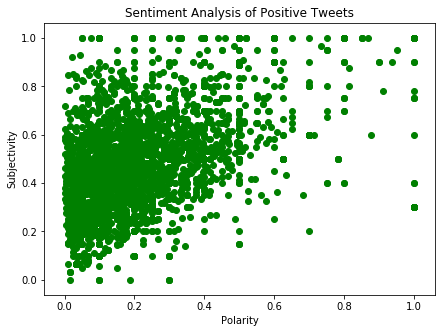

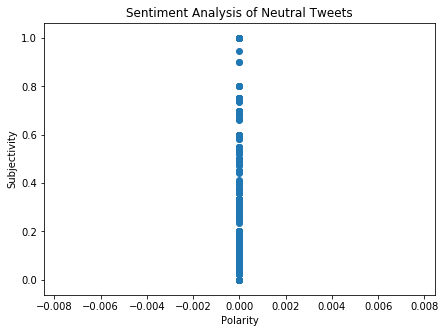

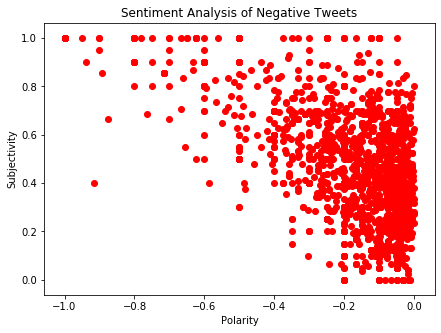

In [24]:
# Positive Tweets
plt.figure(figsize=(7,5))
plt.scatter(positive_tweets["Polarity"], positive_tweets["Subjectivity"],  c='green')
plt.title('Sentiment Analysis of Positive Tweets') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

# Neutral Tweets
plt.figure(figsize=(7,5))
plt.scatter(neutral_tweets["Polarity"], neutral_tweets["Subjectivity"])
plt.title('Sentiment Analysis of Neutral Tweets') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

# Negative Tweets
plt.figure(figsize=(7,5))
plt.scatter(negative_tweets["Polarity"], negative_tweets["Subjectivity"], c='red')
plt.title('Sentiment Analysis of Negative Tweets') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity')
plt.show()

In [25]:
print(data["Analysis"].value_counts())
print("Total:", data.shape[0])
print()

print("Percentage of positive Tweets:", (positive_tweets.shape[0] / data.shape[0]))
print()

print("Percentage of neutral Tweets:", (neutral_tweets.shape[0] / data.shape[0]))
print()

print("Percentage of negative Tweets:", (negative_tweets.shape[0] / data.shape[0]))

Positive    3417
Neutral     2265
Negative    1818
Name: Analysis, dtype: int64
Total: 7500

Percentage of positive Tweets: 0.4556

Percentage of neutral Tweets: 0.302

Percentage of negative Tweets: 0.2424


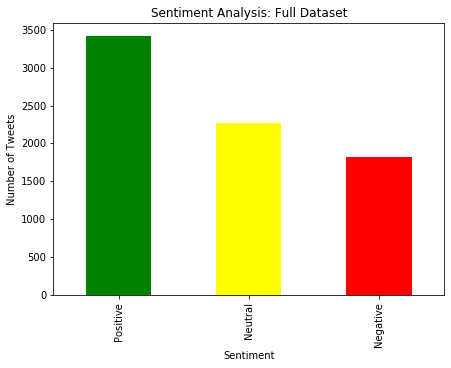

In [26]:
plt.figure(figsize=(7,5))
plt.title("Sentiment Analysis: Full Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
data["Analysis"].value_counts().plot(kind = "bar", color=['green','yellow','red'])
plt.show()

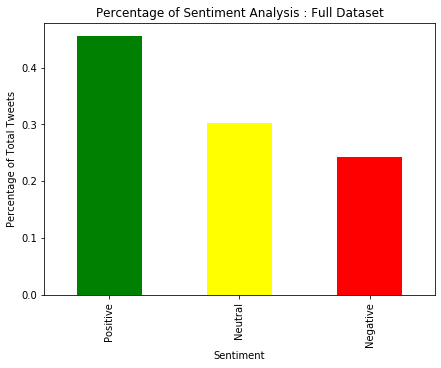

In [27]:
plt.figure(figsize=(7,5))
plt.title("Percentage of Sentiment Analysis : Full Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Percentage of Total Tweets")
((data["Analysis"].value_counts())/data.shape[0]).plot(kind = "bar",  color=['green','yellow','red'])
plt.show()

### Analysis: Monthly

In [28]:
months = list(dict.fromkeys(data["Month"].values))
sentiments = list(dict.fromkeys(data["Analysis"].values))
sentiment_colors = {"Positive": "Green", "Negative": "Red", "Neutral": "Yellow"}

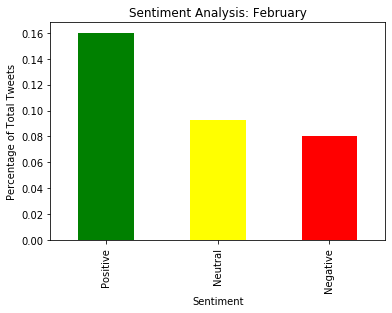

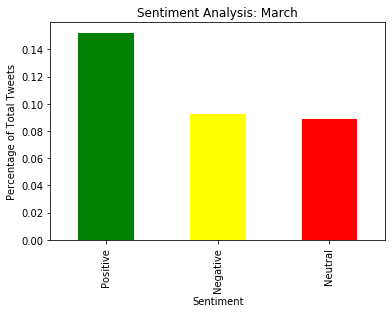

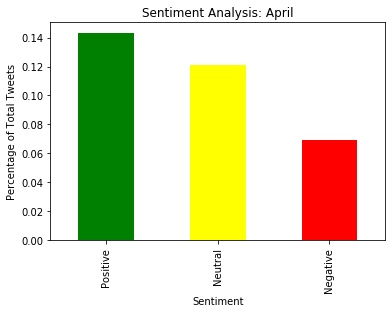

In [29]:
for month in months:
    month_tweets = data.loc[data["Month"] == month]
    plt.title("Sentiment Analysis: " + month)
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage of Total Tweets")
    ((month_tweets["Analysis"].value_counts())/data.shape[0]).plot(kind = 'bar', color=['green','yellow','red'])
    plt.show()

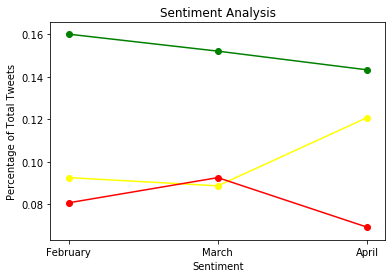

In [30]:
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Percentage of Total Tweets")
    
for sentiment in sentiments:
    month_percentages = []
    sentiment_tweets = data.loc[data["Analysis"] == sentiment]
    for month in months:
        month_tweets = sentiment_tweets.loc[sentiment_tweets["Month"] == month]
        month_percentages.append(month_tweets["Analysis"].value_counts()/data.shape[0])
    plt.scatter(months, month_percentages, c = sentiment_colors[sentiment]) 
    plt.plot(months, month_percentages, c = sentiment_colors[sentiment])
plt.show()

### Training the model

In [127]:
corpus = pd.read_csv("full_corpus.csv")

corpus["TweetText"] = corpus["TweetText"].apply(cleanText)
corpus["List of Words"] = corpus["TweetText"].apply(convertToList)

In [128]:
corpus.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText,List of Words
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,now all has to do is get swype on the iphone ...,"[get, swype, iphone, crack, iphone]"
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,will be adding more carrier support to the ip...,"[adding, carrier, support, iphone, 4s, announced]"
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,hilarious video - guy does a duet with 's si...,"[hilarious, video, guy, duet, 's, siri, pretty..."
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,you made it too easy for me to switch to iph...,"[made, easy, switch, iphone, see, ya]"
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,i just realized that the reason i got into twi...,"[realized, reason, got, twitter, ios5, thanks]"


In [130]:
training_data, testing_data = train_test_split(corpus, test_size = 0.05)

In [131]:
training_data_list = []
for index, row in training_data.iterrows():
    training_data_list.append((row["TweetText"], row["Sentiment"]))

testing_data_list = []
for index, row in testing_data.iterrows():
    testing_data_list.append((row["TweetText"], row["Sentiment"]))

In [132]:
def build(input_data):
    world_list = []
    
    for (words, sentiment) in input_data:
        world_list.extend(words)

    words = nltk.FreqDist(world_list)
    word_features = words.keys()
    
    return word_features

In [133]:
def get_features(text):
    words = set(text)
    features = {}
    
    for word in word_features:
        features['contains(%s)' % word] = (word in words)
        
    return features 

In [134]:
word_features = build(training_data_list)
training_features = nltk.classify.apply_features(get_features, training_data_list)

In [135]:
naive_bayes_classifier = nltk.NaiveBayesClassifier.train(training_features)

In [136]:
classifier_result_labels = [naive_bayes_classifier.classify(get_features(tweet[0])) for tweet in testing_data_list]


In [137]:
print("Percentage of Positive Sentiments:", classifier_result_labels.count('positive') / testing_data.shape[0])
print()
print("Percentage of Negative Sentiments:", classifier_result_labels.count('negative') / testing_data.shape[0])


Percentage of Positive Sentiments: 0.03125

Percentage of Negative Sentiments: 0.0625


### Applying the Model to Covid-19 Twitter Data

In [138]:
training_data, testing_data = train_test_split(data, test_size = 0.2)

In [139]:
word_features = build(training_data_list)
training_features = nltk.classify.apply_features(get_features, training_data_list)

In [140]:
naive_bayes_classifier = nltk.NaiveBayesClassifier.train(training_features)

In [141]:
covid_classifier_labels = [naive_bayes_classifier.classify(get_features(row[3])) for index, row in data.iterrows()]

In [142]:
data["Classification"] = covid_classifier_labels
data["Ensemble"] = covid_classifier_labels # temporary

In [143]:
for index, row in data.iterrows():
    if row["Polarity"] < -0.2:
        row["Ensemble"] = "negative"
    elif row["Polarity"] > 0.2 and row["Classification"] == "neutral":
        row["Ensemble"] = "positive"

In [144]:
data.loc[data["Polarity"] < -0.2, "Ensemble"] = "negative"
data.loc[data["Polarity"] > 0.2, "Ensemble"] = "positive"

In [145]:
print(data["Ensemble"].value_counts())

irrelevant    3901
positive      1659
neutral       1318
negative       622
Name: Ensemble, dtype: int64


## Covid Cases

In [146]:
confirmed = pd.read_csv('covid_confirmed.csv')
recovered = pd.read_csv('covid_recovered.csv')
deaths = pd.read_csv('covid_deaths.csv')

In [147]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45


In [148]:
confirmed_mas = confirmed.loc[confirmed["Country/Region"] == "Malaysia"]
deaths_mas = deaths.loc[deaths["Country/Region"] == "Malaysia"]
recovered_mas = recovered.loc[recovered["Country/Region"] == "Malaysia"]

In [149]:
confirmed_mas.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
153,NaN,Malaysia,2.5,112.5,0,0,0,3,4,4,...,6071,6176,6298,6353,6383,6428,6467,6535,6589,6656


In [150]:
df_list = [confirmed_mas, deaths_mas, recovered_mas]

for i in range(3):
    df = df_list[i].drop(columns = ["Province/State", "Country/Region", "Lat", "Long"])
    dates, values = [], []

    for j in df:
        dates.append(j)
        values.append(df.iloc[0][j])
        
    new_data = {'Date': dates, 'Cases': values}
    df_list[i] = pd.DataFrame(new_data)

confirmed_mas = df_list[0]
deaths_mas = df_list[1]
recovered_mas = df_list[2]

In [151]:
confirmed_mas.head()

,Date,Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,3
4,1/26/20,4


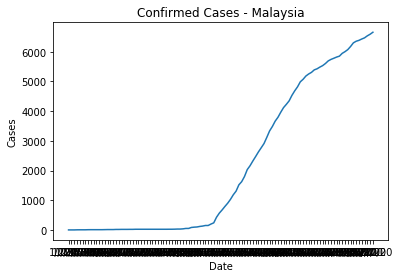

In [152]:
plt.title("Confirmed Cases - Malaysia")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.plot(confirmed_mas["Date"], confirmed_mas["Cases"])
plt.show()

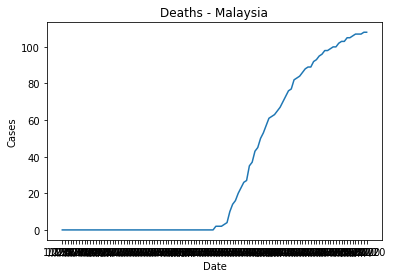

In [153]:
plt.title("Deaths - Malaysia")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.plot(deaths_mas["Date"], deaths_mas["Cases"])
plt.show()

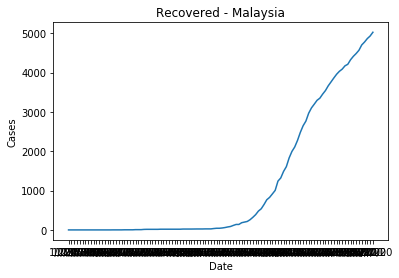

In [154]:
plt.title("Recovered - Malaysia")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.plot(recovered_mas["Date"], recovered_mas["Cases"])
plt.show()

In [172]:
def convertToWeekly(df):
    new_dates, new_cases = [], []
    count = 0

    for index, row in df.iterrows():
        if (count == 6):
            new_dates.append(row["Date"])
            new_cases.append(row["Cases"])
            count = 0
        else:
            count += 1
    
    new_data = {'Date': new_dates, 'Cases': new_cases}
    return pd.DataFrame(new_data)

In [173]:
confirmed_mas_weekly = convertToWeekly(confirmed_mas)
deaths_mas_weekly = convertToWeekly(deaths_mas)
recovered_mas_weekly = convertToWeekly(recovered_mas)

In [174]:
def convertToWeekly(df):
    new_dates, new_cases = [], []
    count = 0

    for index, row in df.iterrows():
        if (count == 6):
            new_dates.append(row["Date"])
            new_cases.append(row["Cases"])
            count = 0
        else:
            count += 1
    
    new_data = {'Date': new_dates, 'Cases': new_cases}
    return pd.DataFrame(new_data)

In [175]:
confirmed_mas_weekly.head()

,Date,Cases
0,1/28/20,4
1,2/4/20,10
2,2/11/20,18
3,2/18/20,22
4,2/25/20,22


In [176]:
dates = list(confirmed_mas_weekly["Date"].values)

In [177]:
def getWeeklyResults(df):
    results_list = []

    for date in dates:
        month = date[0:1]
        day = ""
        
        if len(date) == 7:
            day = date[2:4]
        else:
            day = date[2:3]
                
        date_results = []
    
        for index, row in df.iterrows():
            tweet_date = row["Date"]
            tweet_month = date[0:1]
            tweet_day = "" 
            
            if len(tweet_date) == 7:
                tweet_day = tweet_date[2:4]
            else:
                tweet_day = tweet_date[2:3]
            
            if tweet_month <= month:
                if tweet_day <= day:
                    date_results.append(row["Ensemble"])
        
        results_list.append(date_results)
    
    return results_list

In [179]:
weekly_results = getWeeklyResults(data)
week_counts = {}
for i in range(len(weekly_results)):
    if (len(weekly_results[i]) != 0):
        date = dates[i]
        total_count = len(weekly_results[i])
        counter = Counter(weekly_results[i])
        positive_percent = counter["positive"] / total_count
        neutral_percent = counter["neutral"] / total_count
        negative_percent = counter["negative"] / total_count
        irrelevant_percent = counter["irrelevant"] / total_count
        week_counts[date] = [total_count, positive_percent, neutral_percent, negative_percent]

In [180]:
def normalize(df):
    df["Normalized"] = (df["Cases"] - df["Cases"].min()) / (df["Cases"].max() - df["Cases"].min())
    return df

In [181]:
for df in [confirmed_mas_weekly, recovered_mas_weekly, deaths_mas_weekly]:
    df = normalize(df)

In [182]:
recovered_mas.tail()

,Date,Cases
105,5/6/20,4702
106,5/7/20,4776
107,5/8/20,4864
108,5/9/20,4929
109,5/10/20,5025


In [183]:
def clean(df):
    for index, row in df.iterrows():
        if row["Date"] not in week_counts:
            df = df[df.Date != row["Date"]]
    return df

In [184]:
confirmed_mas_weekly = clean(confirmed_mas_weekly)
recovered_mas_weekly = clean(recovered_mas_weekly)
deaths_mas_weekly = clean(deaths_mas_weekly)

In [185]:
def addTweetSentiment(df, i):
    sentiment_list = []
    
    for index, row in df.iterrows():
        if row["Date"] in week_counts:
            sentiments = week_counts[row["Date"]]
            sentiment_list.append(sentiments[i])
        
    df[str(i)] = sentiment_list
    return df

In [186]:
for i in range(1, 4, 1):
    confirmed_mas_weekly = addTweetSentiment(confirmed_mas_weekly, i)
    recovered_mas_weekly = addTweetSentiment(recovered_mas_weekly, i)
    deaths_mas_weekly = addTweetSentiment(deaths_mas_weekly, i)

In [187]:
confirmed_mas_weekly.head()

,Date,Cases,Normalized,1,2,3
0,1/28/20,4,0.000000,0.219000,0.182600,0.084000
1,2/4/20,10,0.000941,0.217979,0.178346,0.085570
3,2/18/20,22,0.002822,0.218572,0.188567,0.088722
4,2/25/20,22,0.002822,0.219000,0.182600,0.084000
5,3/3/20,36,0.005016,0.219000,0.182600,0.084000


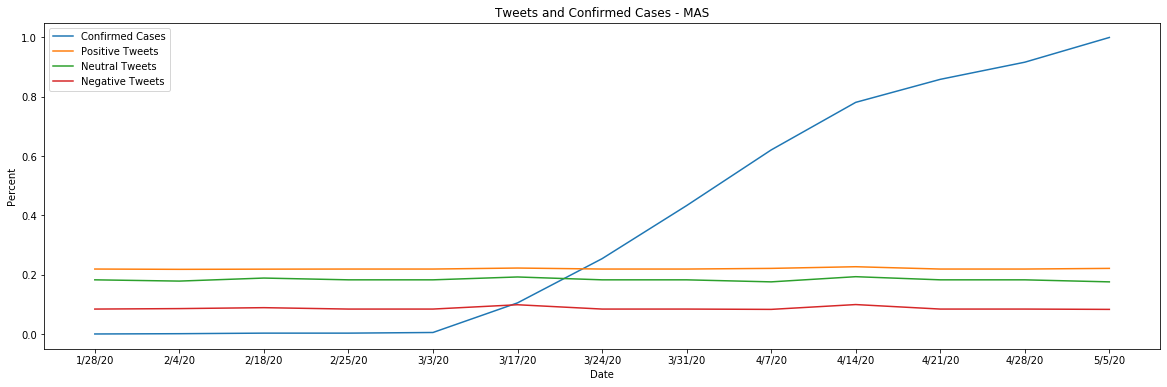

In [188]:
plt.rcParams["figure.figsize"] = (20,6)

plt.title("Tweets and Confirmed Cases - MAS")
plt.xlabel("Date")
plt.ylabel("Percent")

plt.plot(confirmed_mas_weekly["Date"], confirmed_mas_weekly["Normalized"])
for i in range(1, 4, 1):
    plt.plot(confirmed_mas_weekly["Date"], confirmed_mas_weekly[str(i)])
plt.legend(["Confirmed Cases", "Positive Tweets", "Neutral Tweets", "Negative Tweets"])

plt.show()

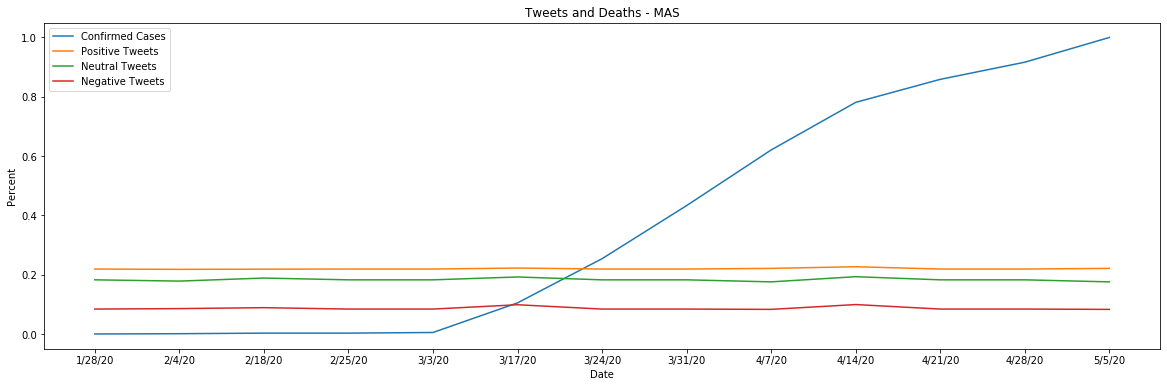

In [189]:
plt.rcParams["figure.figsize"] = (20,6)

plt.title("Tweets and Deaths - MAS")
plt.xlabel("Date")
plt.ylabel("Percent")

plt.plot(confirmed_mas_weekly["Date"], confirmed_mas_weekly["Normalized"])
for i in range(1, 4, 1):
    plt.plot(confirmed_mas_weekly["Date"], confirmed_mas_weekly[str(i)])
plt.legend(["Confirmed Cases", "Positive Tweets", "Neutral Tweets", "Negative Tweets"])

plt.show()

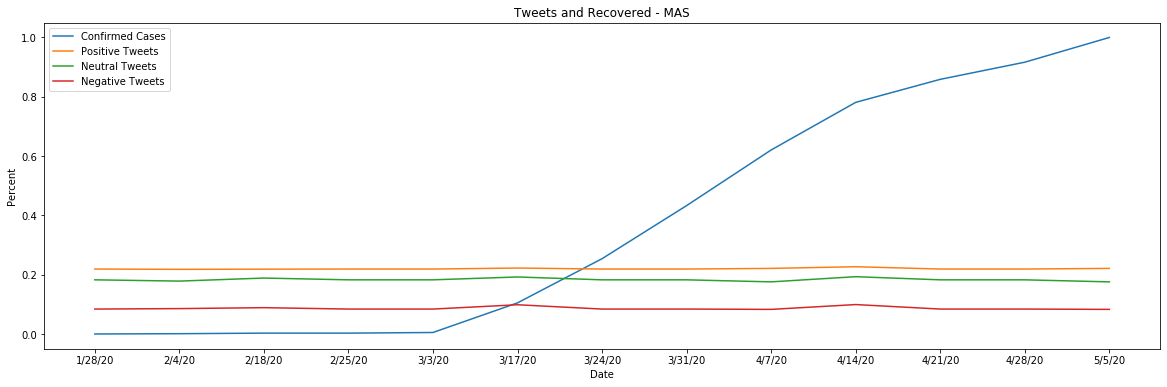

In [190]:
plt.rcParams["figure.figsize"] = (20,6)

plt.title("Tweets and Recovered - MAS")
plt.xlabel("Date")
plt.ylabel("Percent")

plt.plot(confirmed_mas_weekly["Date"], confirmed_mas_weekly["Normalized"])
for i in range(1, 4, 1):
    plt.plot(confirmed_mas_weekly["Date"], confirmed_mas_weekly[str(i)])
plt.legend(["Confirmed Cases", "Positive Tweets", "Neutral Tweets", "Negative Tweets"])

plt.show()